# Regresión lineal 

Intentaremos adivinar cuánto crecerá una zanahoria en un huerto después de que haya pasado un número específico de días en la tierra. Usaremos la "regresión lineal" para dibujar una línea que nos ayude a predecir el tamaño de las zanahorias en el futuro.

## Paso 1: Preparando los datos del tamaño de las zanahorias

Vamos a crear una lista de datos sobre zanahorias que hemos medido. Sabemos cuántos días llevan creciendo y cuál es su tamaño.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Paso 1: Preparación del conjunto de datos (Simulados)

In [10]:
# Parámetros del modelo
np.random.seed(0)  # Para reproducibilidad
dias = np.arange(1, 31).reshape(-1, 1)  # Días que lleva cada zanahoria creciendo (30 días)
pendiente = 2  # Crecimiento lineal aproximado de 2 cm cada dos días
intercepto = 1  # Tamaño inicial
ruido = np.random.normal(0, 1, dias.shape[0])  # Ruido pequeño para variar ligeramente el crecimiento

# Generación de tamaños con ruido
tamanos = pendiente * dias.flatten() + intercepto + ruido

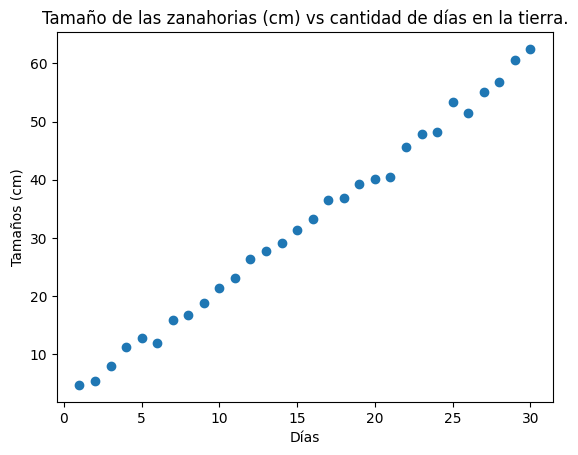

In [11]:
plt.scatter(dias, tamanos)
plt.title("Tamaño de las zanahorias (cm) vs cantidad de días en la tierra.")
plt.xlabel("Días")
plt.ylabel("Tamaños (cm)")
plt.show()

## Paso 2: Dividimos los Datos en "Entrenamiento" y "Prueba"

Para asegurarnos de que el modelo pueda hacer predicciones correctas incluso con zanahorias que no ha visto antes, dividimos los datos en dos partes:

* **Datos de Entrenamiento:** Son los datos que el modelo usará para aprender.
* **Datos de Prueba:** Son los datos que usaremos para ver qué tan bien funciona el modelo con nuevos ejemplos.

In [14]:
# Dividimos los datos en entrenamiento (80%) y prueba (20%)
dias_entrenamiento, dias_prueba, tamanos_entrenamiento, tamanos_prueba = train_test_split(dias, tamanos, test_size=0.2, random_state=42)

## Paso 3: Crear el Modelo de Regresión Lineal

Ahora que tenemos los datos divididos, crearemos nuestro modelo de regresión lineal con los hiperparámetros y lo entrenaremos con los datos de entrenamiento.

In [16]:
# Creamos el modelo de regresión lineal
modelo = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)

# Entrenamos el modelo con los datos de entrenamiento
modelo.fit(dias_entrenamiento, tamanos_entrenamiento)

LinearRegression(n_jobs=1)

## Conceptos Importantes en la Regresión Lineal

1. **Pendiente y Tamaño Inicial (Intersección):**

* La pendiente nos dice cuánto crece la zanahoria cada día en promedio.
* La intersección nos indica el tamaño inicial o de partida de la zanahoria (aunque realmente no las medimos en el día 0).

Vamos a ver estos valores en nuestro modelo:

In [17]:
print("Pendiente:", modelo.coef_[0])
print("Intersección (tamaño inicial):", modelo.intercept_)

Pendiente: 1.9780730398174435
Intersección (tamaño inicial): 1.9030355100122733


2. **Hiperparámetros:**

* **fit_intercept:** Esto le dice al modelo si debe calcular el tamaño inicial.
* **copy_X:** Esto controla si el modelo guarda una copia de los datos originales.
* **n_jobs:** Nos permite elegir cuántos "ayudantes" (procesos) usamos para hacer el cálculo.

## Paso 4: Haciendo Predicciones con los Datos de Prueba

Ahora que el modelo ha aprendido usando los datos de entrenamiento, es momento de ver cómo se comporta con los datos de prueba. Esto nos ayudará a ver si el modelo es realmente útil.

In [18]:
# Predicciones con los datos de prueba
predicciones_prueba = modelo.predict(dias_prueba)

## Paso 5: Validación del Modelo

La validación es como una prueba final para ver si el modelo está haciendo buenas predicciones. Usaremos dos medidas importantes:

* **Error Cuadrático Medio (Mean Squared Error, MSE):** Esto nos dice cuánto se está equivocando el modelo en promedio. Cuanto menor sea este número, mejor.

* **Coeficiente de Determinación (R² Score):** Esto nos dice qué tan bien el modelo está haciendo su trabajo. Es un número entre 0 y 1, donde 1 significa que el modelo es perfecto.

In [20]:
# Calcular el MSE y R² para los datos de prueba
mse = mean_squared_error(tamanos_prueba, predicciones_prueba)
r2 = r2_score(tamanos_prueba, predicciones_prueba)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)

Error Cuadrático Medio (MSE): 0.46078216749254236
Coeficiente de Determinación (R²): 0.997478617963602


## Paso 6: Visualizando los Resultados

Para entender mejor, vamos a dibujar la línea de predicción y los puntos reales de las zanahorias.

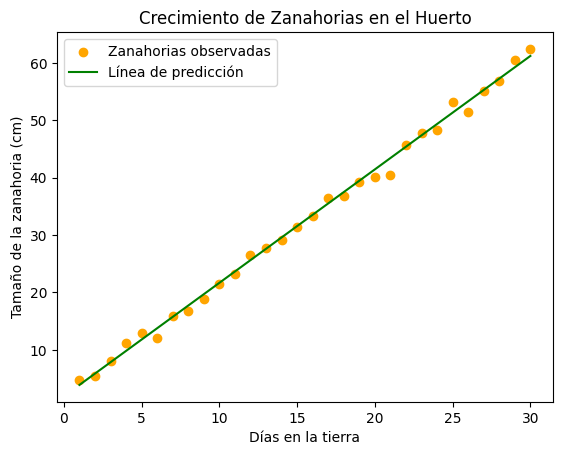

In [21]:
# Dibujar los puntos de datos y la línea de predicción
plt.scatter(dias, tamanos, color="orange", label="Zanahorias observadas")  # Puntos reales
plt.plot(dias, modelo.predict(dias), color="green", label="Línea de predicción")  # Línea de predicción
plt.xlabel("Días en la tierra")
plt.ylabel("Tamaño de la zanahoria (cm)")
plt.title("Crecimiento de Zanahorias en el Huerto")
plt.legend()
plt.show()

## Interpretación Final

Los puntos anaranjados representan las zanahorias reales que medimos en el huerto.

La línea verde es la predicción del modelo, que intenta aproximarse a los puntos para predecir el tamaño de nuevas zanahorias.

## Resumen Completo

* **Entrenamiento y Prueba:** Dividimos los datos para ver si el modelo puede predecir bien incluso con datos nuevos.
* **Pendiente y Tamaño Inicial:** Nos ayudan a entender cómo crecen las zanahorias cada día.
* **Error Cuadrático Medio (MSE):** Nos dice cuánto se equivoca el modelo en promedio.
* **Coeficiente de Determinación (R²):** Nos dice qué tan bien el modelo entiende el patrón de crecimiento de las zanahorias.
* **Visualización:** Nos permite ver cómo la línea de predicción se acerca a los datos reales.